In [32]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
dataset = xr.open_dataset('/Users/annadugoul/Documents/ERA5/4cape')
dataset

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 101, time: 13248)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 ... 2018-08-31T23:00:00
Data variables:
    cape       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-24 14:29:54 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [33]:
dataarray = dataset.cape.resample(time='1D').interpolate('linear')
dataarray

<xarray.DataArray 'cape' (time: 5936, latitude: 101, longitude: 181)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.46992188e+01, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.71975293e+03, 1.81550391e+03, 1.86002051e+03, ...,
         1.30230859e+03, 1.31952734e+03, 1.49633203e+03],
        [1.56310645e+03, 1.65885742e+03, 1.74620996e+03, ...,
         1.13306250e+03, 1.11878418e+03, 1.25989160e+03],
        [1.41275879e+03, 1.44971582e+03, 1.52992871e+03, ...,
         1.12130371e+03, 1.08644727e+03, 1.13726270e+03]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.38593750e+01, 1.63789062e+01, 1.63789062e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.55146484e+01, 6.88740234e+01, 7.30742188e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [1.80585938e+01, 2.30976562e+01, 2.18378906e+01, ...,
         2.22034961e+03, 2.14727637e+03, 2.36187793e+03],
        [1.84785156e+01, 2.26777344e+01, 2.56181641e+01, ...,
         2.25058691e+03, 2.41311328e+03, 2.45930957e+03],
        [2.39384766e+01, 2.81376953e+01, 2.93974609e+01, ...,
         2.29888281e+03, 2.48492676e+03, 2.46266895e+03]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [7.93730469e+01, 7.97929688e+01, 7.60136719e+01, ...,
         3.57389355e+03, 3.56381445e+03, 3.32905469e+03],
        [6.97138672e+01, 7.05537109e+01, 7.30742188e+01, ...,
         3.53399707e+03, 3.46386328e+03, 3.14720996e+03],
        [4.61962891e+01, 5.20751953e+01, 5.50156250e+01, ...,
         3.34669336e+03, 3.26900000e+03, 2.98888379e+03]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31
Attributes:
    units:      J kg**-1
    long_name:  Convective available potential energy

In [35]:
surface_pressure = xr.open_dataset('/Users/annadugoul/Documents/ERA5/3sp')
dataarray_sp = surface_pressure.sp.resample(time='1D').interpolate('linear')
dataarray_sp

<xarray.DataArray 'sp' (time: 5936, latitude: 101, longitude: 181)>
array([[[ 97988.625    ,  97929.2578125,  97795.0703125, ...,
          85491.703125 ,  85841.390625 ,  86603.390625 ],
        [ 97906.484375 ,  97664.140625 ,  97554.359375 , ...,
          86486.28125  ,  86957.9609375,  87867.9609375],
        [ 97188.40625  ,  96914.34375  ,  96789.921875 , ...,
          88004.5859375,  87836.25     ,  87935.4609375],
        ...,
        [100593.3984375, 100577.9453125, 100575.5078125, ...,
         100442.953125 , 100470.6015625, 100437.2578125],
        [100598.28125  , 100598.28125  , 100587.703125 , ...,
         100460.03125  , 100490.1171875, 100460.03125  ],
        [100606.40625  , 100628.3671875, 100616.984375 , ...,
         100485.2421875, 100510.453125 , 100495.       ]],

       [[ 97434.       ,  97373.8203125,  97248.578125 , ...,
          85511.21875  ,  85865.7890625,  86627.7890625],
        [ 97346.171875 ,  97111.140625 ,  97011.9296875, ...,
          86504.171875 ,  86979.1015625,  87886.671875 ],
        [ 96649.234375 ,  96381.6796875,  96263.7578125, ...,
          88015.15625  ,  87854.953125 ,  87959.046875 ],
...
        [100617.796875 , 100610.4765625, 100615.359375 , ...,
         100479.546875 , 100539.7265625, 100536.46875  ],
        [100618.609375 , 100625.1171875, 100620.234375 , ...,
         100491.75     , 100544.609375 , 100541.3515625],
        [100625.1171875, 100650.328125 , 100645.4453125, ...,
         100508.8203125, 100546.234375 , 100553.546875 ]],

       [[ 99140.15625  ,  99078.3515625,  98940.1015625, ...,
          86233.3671875,  86587.9375   ,  87360.5078125],
        [ 99016.546875 ,  98768.5078125,  98655.46875  , ...,
          87238.5234375,  87715.890625 ,  88638.09375  ],
        [ 98243.1640625,  97960.96875  ,  97834.109375 , ...,
          88773.90625  ,  88606.375    ,  88707.21875  ],
        ...,
        [100589.328125 , 100584.453125 , 100589.328125 , ...,
         100863.390625 , 100908.1171875, 100894.296875 ],
        [100590.1484375, 100599.90625  , 100598.28125  , ...,
         100859.328125 , 100903.2421875, 100893.484375 ],
        [100591.7734375, 100625.1171875, 100624.3046875, ...,
         100861.765625 , 100895.921875 , 100895.921875 ]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31
Attributes:
    units:          Pa
    long_name:      Surface pressure
    standard_name:  surface_air_pressure

In [36]:
dataset_sp = dataarray_sp.to_dataset(name='sp')
dataset_sp

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 101, time: 5936)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31
Data variables:
    sp         (time, latitude, longitude) float64 9.799e+04 ... 1.009e+05

In [37]:
sp_hPa = dataset_sp.sp / 100

In [38]:
data = dataarray.where(sp_hPa>=500)

In [39]:
t = data.sel(time=slice('2013-7-4', '2013-7-9'))
t

<xarray.DataArray 'cape' (time: 6, latitude: 101, longitude: 181)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.06572266e+01, 2.26777344e+01, 2.51982422e+01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.77968750e+01, 2.68779297e+01, 2.98173828e+01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.06572266e+01, 2.77177734e+01, 1.59589844e+01],
        ...,
        [7.18558594e+02, 7.24437500e+02, 8.05911133e+02, ...,
         2.22538965e+03, 2.24260742e+03, 2.31904102e+03],
        [6.64802734e+02, 6.92100586e+02, 7.19398438e+02, ...,
         2.26150586e+03, 2.27914453e+03, 2.30980176e+03],
        [5.45113281e+02, 5.73670898e+02, 5.54352539e+02, ...,
         2.24344727e+03, 2.30098242e+03, 2.29930273e+03]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [1.04571289e+02, 9.57519531e+01, 1.54546875e+02, ...,
         1.35690332e+03, 1.36362305e+03, 1.44593652e+03],
        [2.17541016e+02, 2.08301758e+02, 2.22161133e+02, ...,
         1.24897266e+03, 1.28131055e+03, 1.34010547e+03],
        [3.20852539e+02, 3.23791992e+02, 3.31771484e+02, ...,
         1.15280078e+03, 1.17589941e+03, 1.20991602e+03]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.64580078e+01, 2.47783203e+01, 1.46992188e+01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.45996094e+00, 4.62011719e+00, 1.67968750e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.67968750e+00, 4.20019531e+00, 9.65917969e+00],
        ...,
        [1.51187500e+02, 1.41108398e+02, 1.13810547e+02, ...,
         1.45349512e+03, 1.42829785e+03, 1.30440820e+03],
        [1.10450195e+02, 1.10450195e+02, 1.10450195e+02, ...,
         1.42703809e+03, 1.38462109e+03, 1.29642871e+03],
        [7.22343750e+01, 8.44130859e+01, 9.11318359e+01, ...,
         1.41569824e+03, 1.31154785e+03, 1.30650781e+03]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2013-07-04 2013-07-05 ... 2013-07-09
Attributes:
    units:      J kg**-1
    long_name:  Convective available potential energy

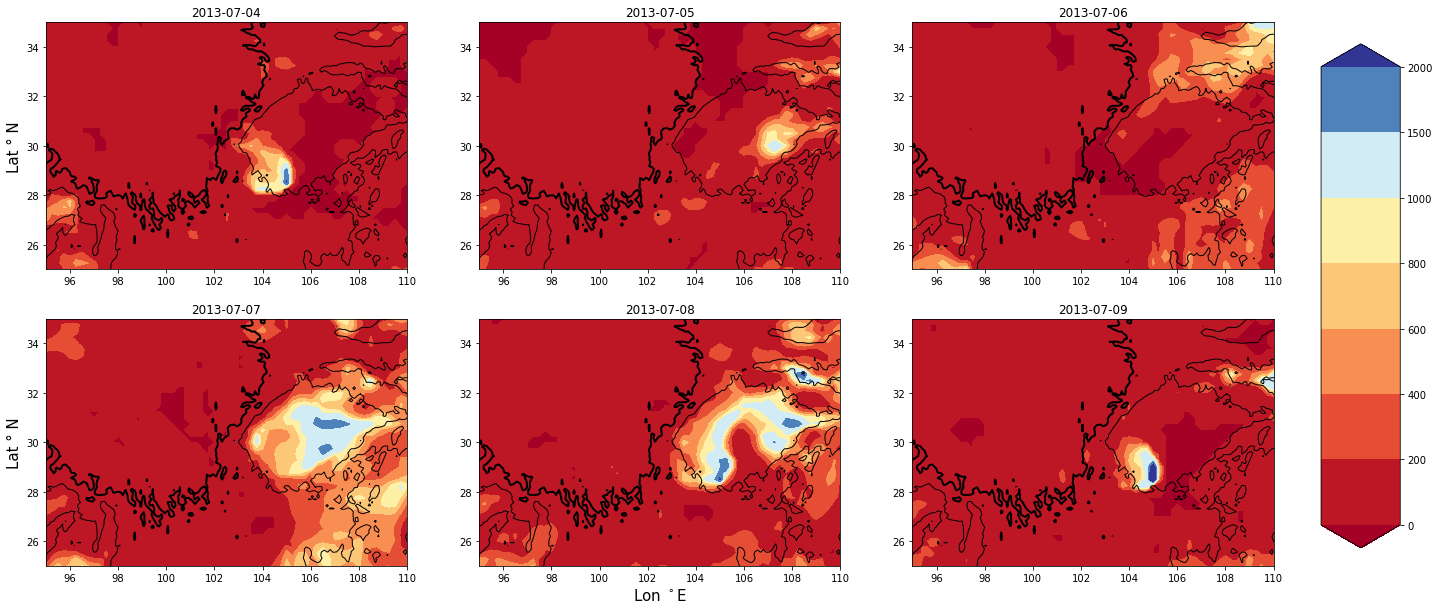

In [43]:
fig, ((ax1, ax2,ax3),(ax4,ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(22, 10))
out='/Users/annadugoul/Documents/Data_Thesis/Geopotential/0205june2002.png'
data = xr.open_dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')
lat = data.latitude
lon = data.longitude
elevations = data.elevation
ax1.set_xlim(95,110)
ax1.set_ylim(25,35)
ax2.set_xlim(95,110)
ax2.set_ylim(25,35)
ax3.set_xlim(95,110)
ax3.set_ylim(25,35)
ax4.set_xlim(95,110)
ax4.set_ylim(25,35)
ax5.set_xlim(95,110)
ax5.set_ylim(25,35)
ax6.set_xlim(95,110)
ax6.set_ylim(25,35)

cmap = plt.cm.RdYlBu
levels = [0,200,400,600,800,1000,1500,2000]

m=ax1.contourf(t.longitude,t.latitude,t[0], cmap=cmap, levels=levels, extend='both')
m=ax2.contourf(t.longitude,t.latitude,t[1], cmap=cmap, levels=levels, extend='both')
m=ax3.contourf(t.longitude,t.latitude,t[2], cmap=cmap, levels=levels, extend='both')
m=ax4.contourf(t.longitude,t.latitude,t[3], cmap=cmap, levels=levels, extend='both')
m=ax5.contourf(t.longitude,t.latitude,t[4], cmap=cmap, levels=levels, extend='both')
m=ax6.contourf(t.longitude,t.latitude,t[5], cmap=cmap, levels=levels, extend='both')
ax1.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax1.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax2.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax2.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax3.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax3.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax4.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax4.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax5.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax5.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax6.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax6.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
fig.colorbar(m,cax=cbar_ax)
ax1.set_title(str(t.time.values[0])[0:10])
ax2.set_title(str(t.time.values[1])[0:10])
ax3.set_title(str(t.time.values[2])[0:10])
ax4.set_title(str(t.time.values[3])[0:10])
ax5.set_title(str(t.time.values[4])[0:10])
ax6.set_title(str(t.time.values[5])[0:10])

ax1.set_ylabel('Lat ° N',  fontsize=15)
ax4.set_ylabel('Lat ° N',  fontsize=15)

ax5.set_xlabel('Lon $^\circ$E',  fontsize=15)

fig.subplots_adjust()
plt.savefig(out,bbox_inches = 'tight', transparent = False, facecolor = 'white')